# Home work on Metric of Machine Learning for Classification

Datasets used is from the previous week assignment


In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [9]:
df = pd.read_csv('bank-full.csv', sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [11]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [13]:
del df['loan']

In [15]:
del df['default']

In [17]:
df.head()

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,-1,0,unknown,no


In [19]:
df

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,825,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,1729,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,5715,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,668,no,telephone,17,nov,508,4,-1,0,unknown,no


In [21]:
df.y = (df.y == 'yes').astype(int)

In [23]:
df

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,825,no,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,1729,no,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,5715,no,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,668,no,telephone,17,nov,508,4,-1,0,unknown,0


# Perform the train/validation/test split with Scikit-Learn

In [26]:
from sklearn.model_selection import train_test_split

In [28]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [30]:
len(df_train), len(df_val), len(df_test)

(27126, 9042, 9043)

In [32]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [34]:
y_train = df_train.y.values
y_val = df_val.y.values
y_test = df_test.y.values

del df_train['y']
del df_val['y']
del df_test['y']

In [37]:
df_full_train = df_full_train.reset_index(drop=True)

In [39]:
numerical = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [41]:
categorical = [
    'job',
    'marital',
    'education',
    'housing',
    'contact',
    'month',
    'poutcome'
]

# Question 1

In [53]:
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score

In [57]:
aucs = {}
for col in numerical:
    auc = roc_auc_score(y_train, df_train[col])
    if auc < 0.5:
        df_train[col] = -df_train[col]
        auc = roc_auc_score(y_train, df_train[col])
    aucs[col] = auc

highest_auc_col = max(aucs, key=aucs.get)
print("Highest AUC:", highest_auc_col, "with AUC:", aucs[highest_auc_col])

Highest AUC: duration with AUC: 0.8147002759670778


In [59]:
aucs

{'age': 0.512185717527344,
 'balance': 0.5888313805382317,
 'day': 0.525957882383908,
 'duration': 0.8147002759670778,
 'campaign': 0.5714543015682159,
 'pdays': 0.5901276247352144,
 'previous': 0.5985653242764153}

# Question 2

In [141]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict_proba(X_val)[:, 1]

q2_auc = roc_auc_score(y_val, y_pred)
print(round(q2_auc, 3))

0.892


# Question 3

In [108]:
scores = []

thresholds = np.linspace(0, 1, 101)

for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)
    
    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)

    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()

    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
    
    
    scores.append((t, tp, fp, fn, tn))

In [110]:
columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
df_scores = pd.DataFrame(scores, columns=columns)

df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fp)
df_scores['fpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)

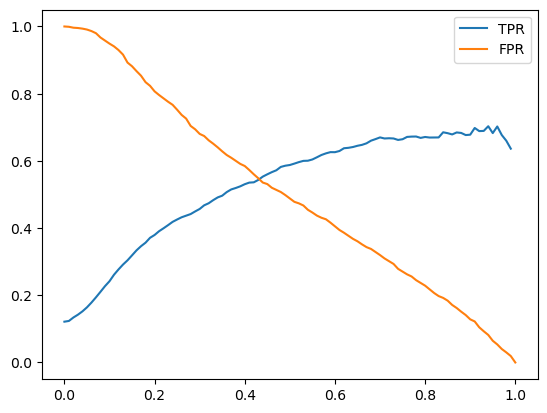

In [112]:
plt.plot(df_scores.threshold, df_scores['tpr'], label='TPR')
plt.plot(df_scores.threshold, df_scores['fpr'], label='FPR')
plt.legend()

In [120]:
# Find the intersection point
intersection_index = np.argmin(abs(df_scores['tpr'] - df_scores['fpr']))
intersection_threshold = thresholds[intersection_index]
print("Intersection Threshold:", intersection_threshold)


Intersection Threshold: 0.43


# Question 4

In [122]:
columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
df_scores = pd.DataFrame(scores, columns=columns)

df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fp)
df_scores['fpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
df_scores['f1'] = 2 * ((df_scores['tpr'] * df_scores['fpr'])/ (df_scores['tpr'] + df_scores['fpr']))

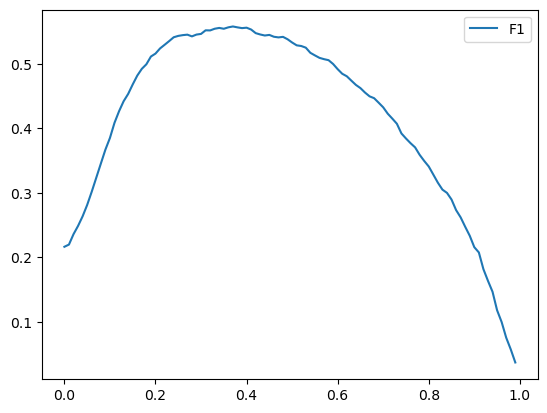

In [155]:
plt.plot(df_scores.threshold, df_scores['f1'], label='F1')


plt.legend()

In [135]:
from sklearn.metrics import f1_score

Optimal Threshold: 0.37


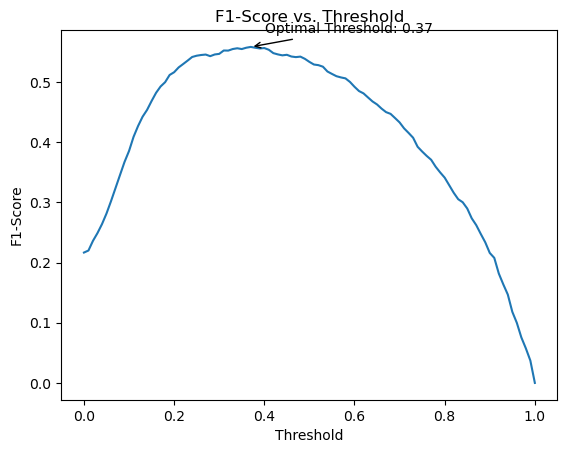

In [163]:
# Assuming you have y_true (actual labels) and y_pred_proba (predicted probabilities)
f1_scores = []
for thresh in np.arange(0.0, 1.01, 0.01):
    y_pred_binary = (y_pred >= thresh).astype(int)
    f1 = f1_score(y_val, y_pred_binary)
    f1_scores.append(f1)

# Find the optimal threshold
optimal_threshold = np.argmax(f1_scores) / 100
print("Optimal Threshold:", optimal_threshold)


# Find the optimal threshold index
optimal_threshold_index = np.argmax(f1_scores)

# Plot the F1-scores
plt.plot(np.arange(0.0, 1.01, 0.01), f1_scores)

# Annotate the optimal point
plt.annotate(f'Optimal Threshold: {optimal_threshold}',
             xy=(optimal_threshold, f1_scores[optimal_threshold_index]),
             xytext=(10, 10),  # Adjust these values as needed
             textcoords='offset points',
             arrowprops=dict(arrowstyle="->"))

plt.xlabel('Threshold')
plt.ylabel('F1-Score')
plt.title('F1-Score vs. Threshold')
plt.show()


# Question 5

In [174]:
def train(df_train, y_train, C=1.0):
    dicts = df_train[categorical + numerical].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
    model.fit(X_train, y_train)
    
    return dv, model

In [178]:
def predict(df, dv, model):
    dicts = df[categorical + numerical].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [182]:
from sklearn.model_selection import KFold

In [184]:
!pip install tqdm

In [192]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

scores = []

for train_idx, val_idx in kfold.split(df_full_train):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]
    
    y_train = df_train.y.values
    y_val = df_val.y.values

    dv, model = train(df_train, y_train)
    y_pred = predict(df_val, dv, model)

    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)

print('%.3f +- %.3f' % (np.mean(scores), np.std(scores)))

0.906 +- 0.006


# Question 6

In [198]:
from tqdm.auto import tqdm

In [208]:
for C in tqdm([0.000001, 0.001, 1]):
    kfold = KFold(n_splits=5, shuffle=True, random_state=1)

    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.y.values
        y_val = df_val.y.values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.round((np.std(scores)),3)))

  0%|          | 0/3 [00:00<?, ?it/s]

C=1e-06 0.906 +- 0.006
C=0.001 0.906 +- 0.006
C=1 0.906 +- 0.006
